In [3]:
from external_potential import Framework, PotentialType, ExternalPotential
import jax
import jax.numpy as jnp

/Users/danielbock/MASTERTHESIS/MASTA/.venv/lib/python3.11/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 10 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  struct = parser.parse_structures(primitive=primitive)[0]


<Axes: xlabel='X-axis', ylabel='Y-axis'>

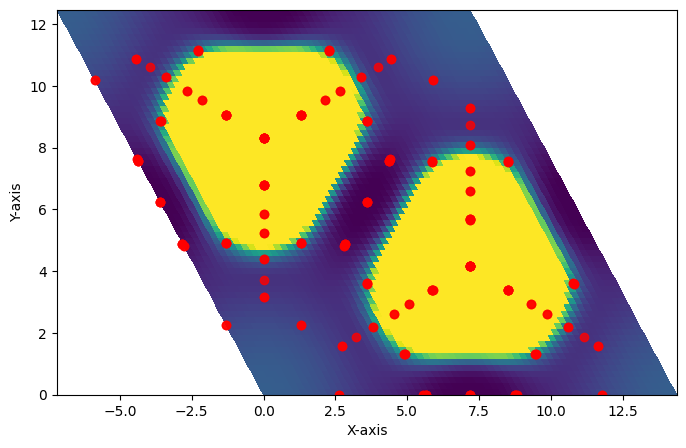

In [23]:
solid_parameters = {
    "O": { "sigma": 3.21, "epsilon_k": 76.3, "lambda_r": 12.0, "molarweight": 16.0 },
    "Si": { "sigma": 0.0, "epsilon_k": 0.0, "lambda_r": 12.0, "molarweight": 28.0 },
    #"Sa": { "sigma": 0.0, "epsilon_k": 0.0, "lambda_r": 12.0, "molarweight": 28.0 }
}

# PC-SAFT
fluid_parameters = {
    "methane": { "m": 1.0, "sigma": 3.70051, "epsilon_k": 150.07147 },
    #"ethane": { "m": 1.60689, "sigma": 3.51681, "epsilon_k": 191.45389 }
}

framework = Framework(cif="/Users/danielbock/PycharmProjects/MA/structures/MWW.cif")

external_potential = framework.calculate_external_potential(
    ngrid=(64,)*3, 
    interaction_potential_type=PotentialType.LennardJones, 
    cutoff_radius=12.0, 
    fluid_parameters=fluid_parameters, 
    solid_parameters=solid_parameters, 
    #binary_interaction_parameters=binary, 
    tail_correction_type='RASPA', 
    #block_files=['block1.res', 'block2.res'],
)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
framework.visualize_external_potential(ax, external_potential.reduced_potential(temperature=298, maximum_reduced_energy=10.0), fluid_index=1, show_contour_lines=False)


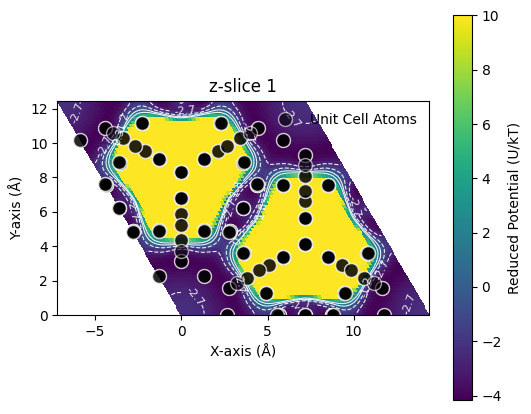

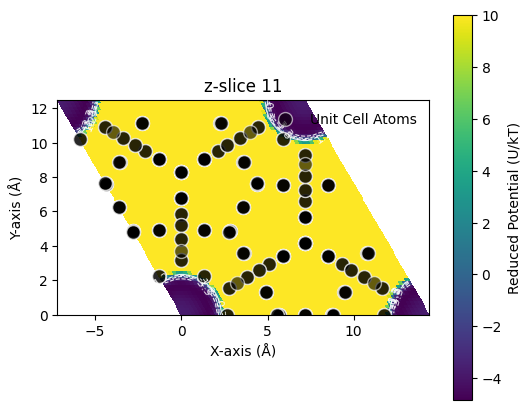

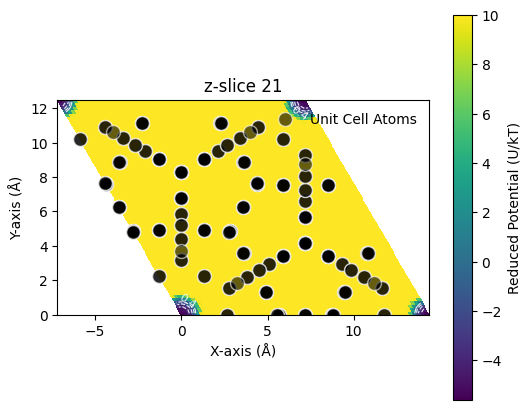

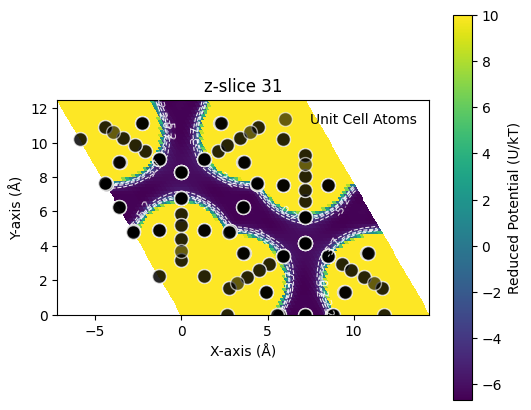

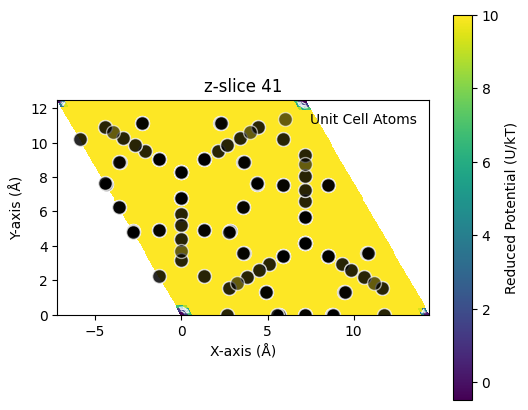

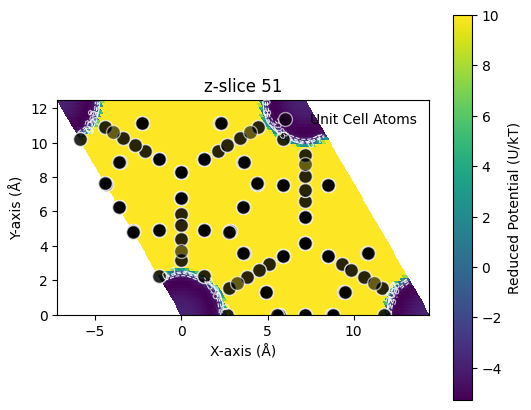

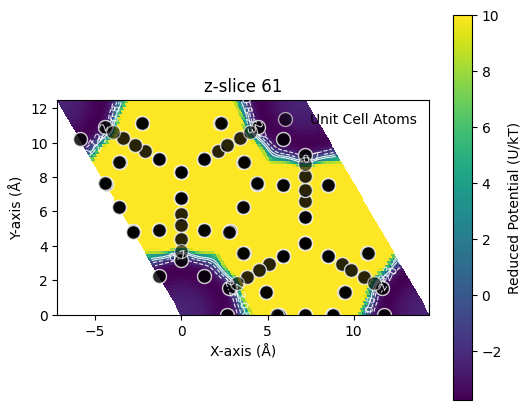

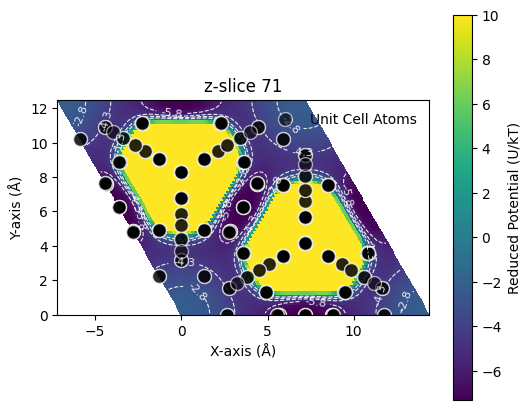

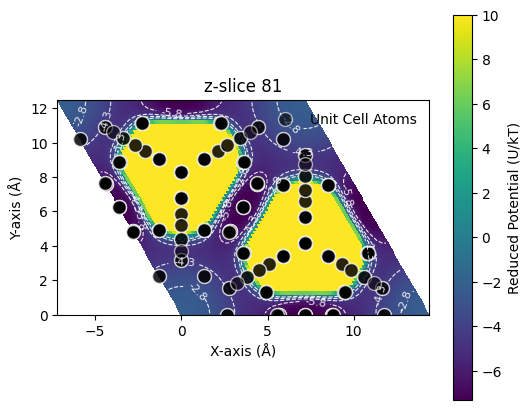

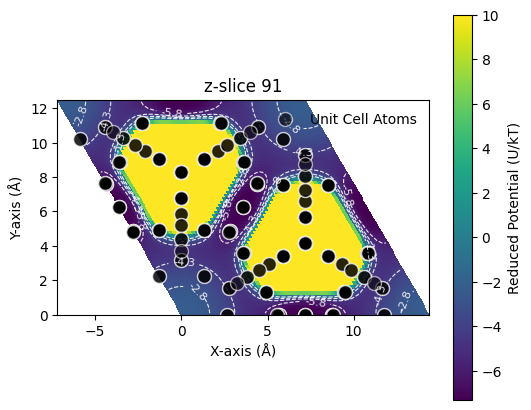

In [27]:
for i in range(1, 101, 10):
    fig, ax = plt.subplots(figsize=(6, 5))
    framework.visualize_external_potential_contour(
        ax,
        external_potential.reduced_potential(
            temperature=298.15,
            maximum_reduced_energy=10.0
        ),
        fluid_index=1,
        z_index=i,
        num_min_contours=5,
        min_contour_offset=1.5,
    )
    plt.title(f"z-slice {i}")
    #plt.savefig(f"slice_{i:03d}.png", dpi=200)
    plt.show()
    plt.close()


